In [1]:
import yfinance as yf
import pandas as pd
import torch
import torch.nn as nn

In [2]:
stock = yf.Ticker("MSFT")
live_data = stock.history(period='5y', interval='1mo')
print(len(live_data))
print(live_data.columns)

60
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [3]:
import matplotlib.pyplot as plt
live_data['R50'] = live_data['Close'].rolling(window=50).mean()
live_data['R200'] = live_data['Close'].rolling(window=200).mean()


Text(0.5, 1.0, 'MSFT Price with 50 & 200 SMA')

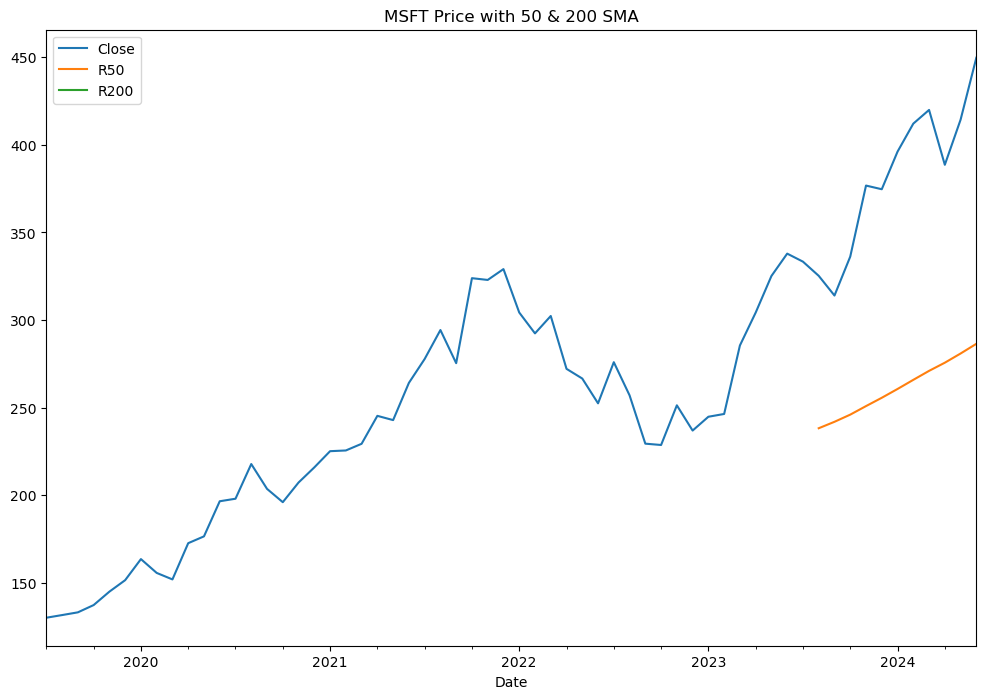

In [4]:
live_data[['Close', 'R50', 'R200']].plot(figsize=(12,8))
plt.title("MSFT Price with 50 & 200 SMA")

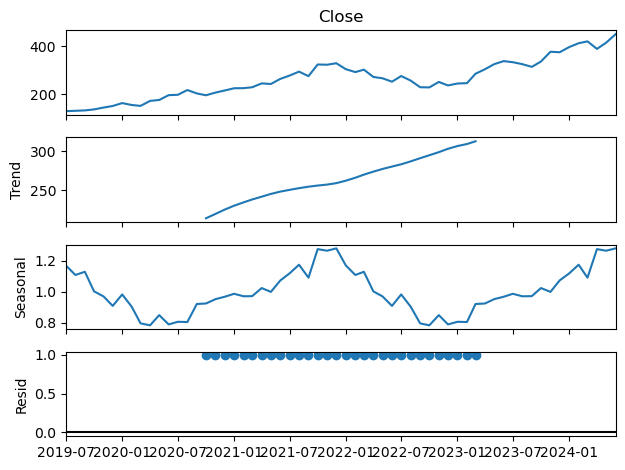

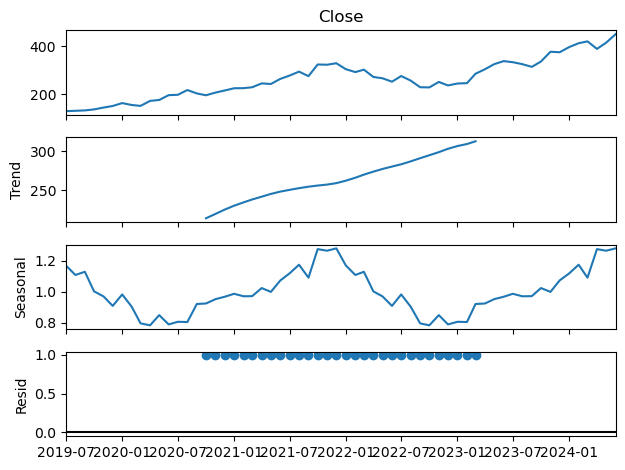

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(live_data['Close'], model='multiplicative', period=30)
decomposition.plot()

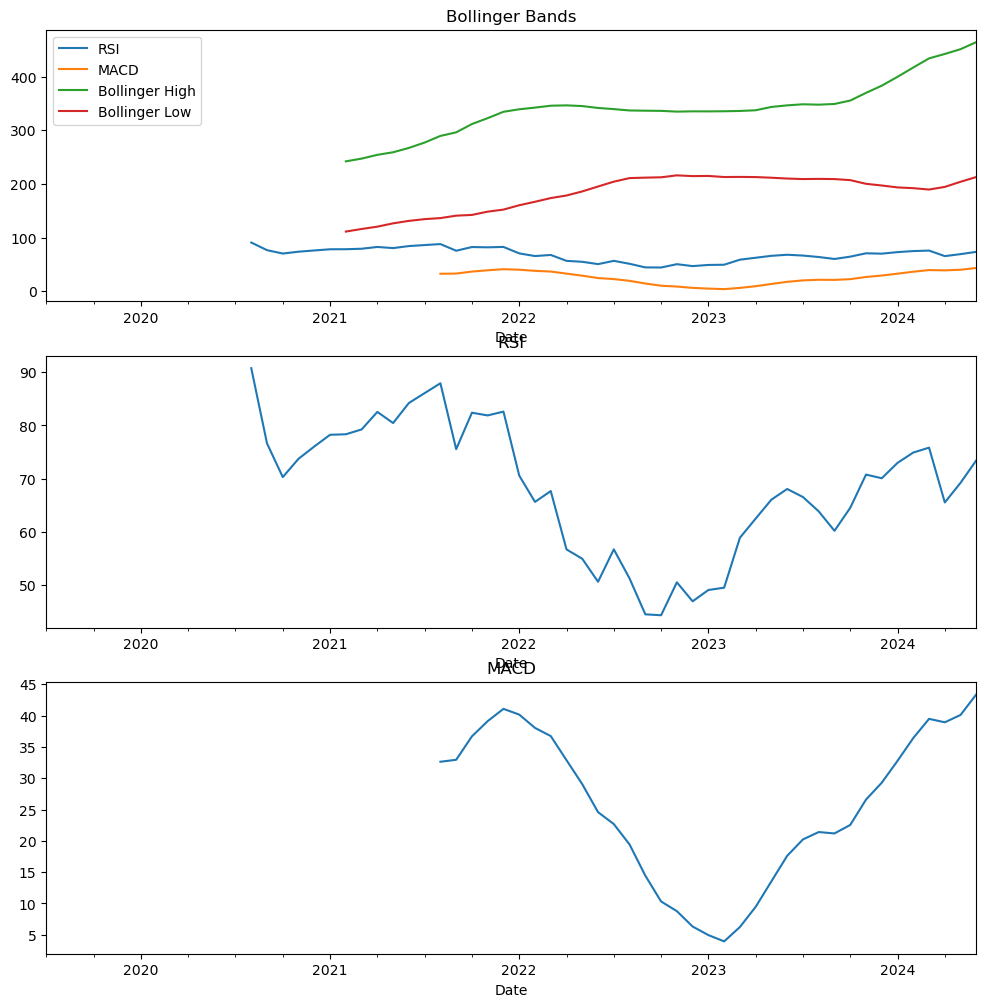

In [6]:
import ta

live_data['RSI'] = ta.momentum.RSIIndicator(live_data['Close']).rsi()
live_data['MACD'] = ta.trend.MACD(live_data['Close']).macd()
live_data['Bollinger High'] = ta.volatility.BollingerBands(live_data['Close']).bollinger_hband()
live_data['Bollinger Low'] = ta.volatility.BollingerBands(live_data['Close']).bollinger_lband()

fig, ax = plt.subplots(3, 1, figsize=(12,12))
live_data[['RSI', 'MACD', 'Bollinger High', 'Bollinger Low']].plot(ax=ax[0])
ax[0].set_title('Bollinger Bands')
live_data['RSI'].plot(ax=ax[1])
ax[1].set_title('RSI')
live_data['MACD'].plot(ax=ax[2])
ax[2].set_title('MACD')

plt.show()

In [7]:
live_data['SP500'] = yf.Ticker("^GSPC").history(period='5y')['Close']

0.9070597195381515


<Axes: xlabel='Date'>

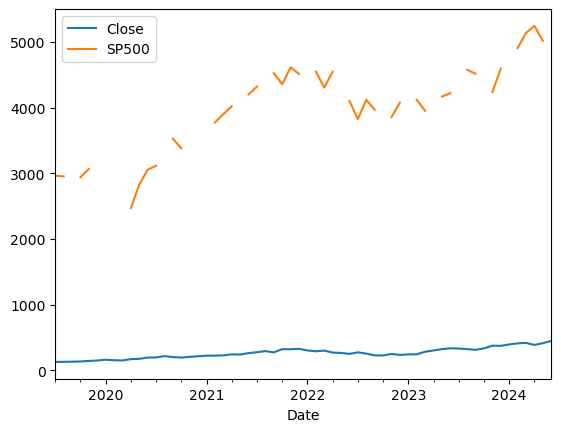

In [8]:
correlation = live_data['Close'].corr(live_data['SP500'])
print(correlation)
live_data[['Close', 'SP500']].plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
adfuller((live_data['Close']-live_data['Close'].shift(12)).dropna())

(-2.943265900937823,
 0.04054315075770232,
 9,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 347.6394934671608)

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(live_data['Close'], order=(11,1,1))
model_fit = model.fit()

forcast = model_fit.predict(start=30, end=60, dynamic=True)

/Users/satyadwyoom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satyadwyoom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satyadwyoom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(df)

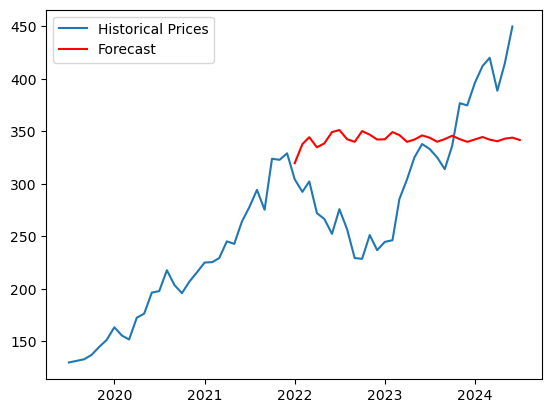

In [12]:
plt.plot(live_data['Close'], label='Historical Prices')
plt.plot(forcast, label='Forecast', color='red')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
model = SARIMAX(live_data['Close'], order=(1,0,1), seasonal_order=(1,1,1,24))
model_fit = model.fit(disp=False)
# print(model_fit.summary())

/Users/satyadwyoom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satyadwyoom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satyadwyoom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [15]:
forcast

2022-01-01 00:00:00-05:00    319.712879
2022-02-01 00:00:00-05:00    337.777729
2022-03-01 00:00:00-05:00    344.397491
2022-04-01 00:00:00-04:00    334.738165
2022-05-01 00:00:00-04:00    338.510136
2022-06-01 00:00:00-04:00    349.281722
2022-07-01 00:00:00-04:00    351.184602
2022-08-01 00:00:00-04:00    342.525022
2022-09-01 00:00:00-04:00    339.967024
2022-10-01 00:00:00-04:00    350.207671
2022-11-01 00:00:00-04:00    346.781576
2022-12-01 00:00:00-05:00    342.164580
2023-01-01 00:00:00-05:00    342.413884
2023-02-01 00:00:00-05:00    349.281181
2023-03-01 00:00:00-05:00    346.385381
2023-04-01 00:00:00-04:00    339.969153
2023-05-01 00:00:00-04:00    342.156814
2023-06-01 00:00:00-04:00    346.099101
2023-07-01 00:00:00-04:00    343.985505
2023-08-01 00:00:00-04:00    340.082265
2023-09-01 00:00:00-04:00    342.582093
2023-10-01 00:00:00-04:00    345.763588
2023-11-01 00:00:00-04:00    342.487177
2023-12-01 00:00:00-05:00    339.971764
2024-01-01 00:00:00-05:00    342.244508


In [17]:
import numpy as np
reg_out = np.load('latest_reg_out.npz')

In [20]:
reg_out

,out
2019-07-01 04:00:00,NaN
2019-08-01 04:00:00,NaN
2019-09-01 04:00:00,NaN
2019-10-01 04:00:00,NaN
2019-11-01 04:00:00,NaN
2019-12-01 05:00:00,NaN
2020-01-01 05:00:00,NaN
2020-02-01 05:00:00,NaN
2020-03-01 05:00:00,NaN
2020-04-01 04:00:00,NaN


In [21]:
reg_out = pd.DataFrame({'out':reg_out['out']}, index=live_data.index.values )

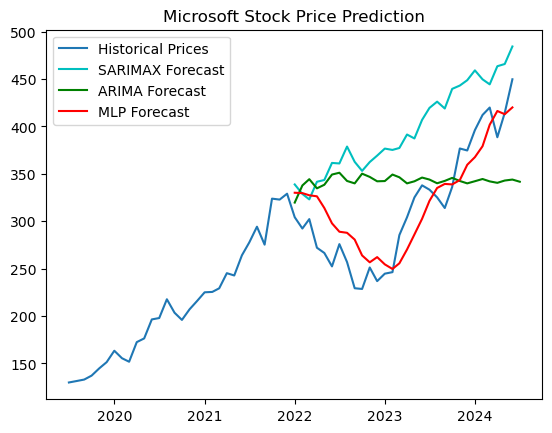

In [22]:
live_data['forecast'] = model_fit.predict(start=30, end=60, dynamic=True)


plt.plot(live_data['Close'], label='Historical Prices')
plt.plot(live_data['forecast'], label='SARIMAX Forecast', color='c')
plt.plot(forcast, label='ARIMA Forecast', color='g')
plt.plot(reg_out['out'], label="MLP Forecast", color="r")
plt.legend()
plt.title('Microsoft Stock Price Prediction')
plt.show()

In [46]:
import numpy as np
print("SARIMAX RMSE Loss: ", np.sqrt(np.mean((live_data['forecast'][30:61] - live_data['Close'][30:61])**2, axis=0)))
print("ARIMA RMSE Loss: ", np.sqrt(np.mean((forcast - live_data['Close'][30:61])**2, axis=0)))
print("MLP RMSE Loss: ", np.sqrt(np.mean((reg_out['out'][30:60].reset_index()['out']  - live_data['Close'][30:60].reset_index()['Close'])**2, axis=0)))


SARIMAX RMSE Loss:  88.37997627599351
ARIMA RMSE Loss:  69.29205868656125
MLP RMSE Loss:  29.807980661256135
